In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/thiagosato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


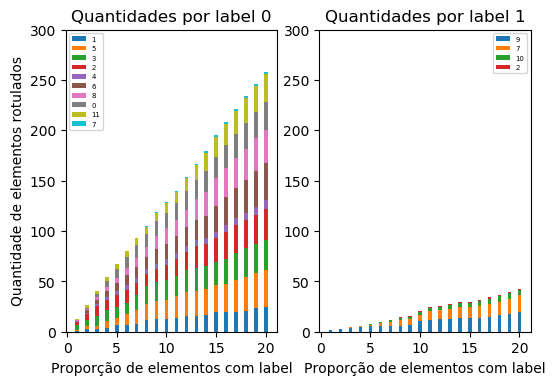

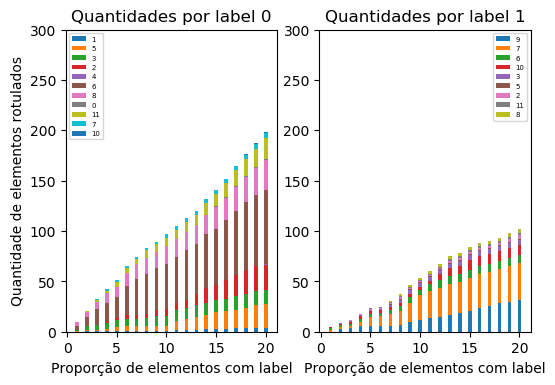

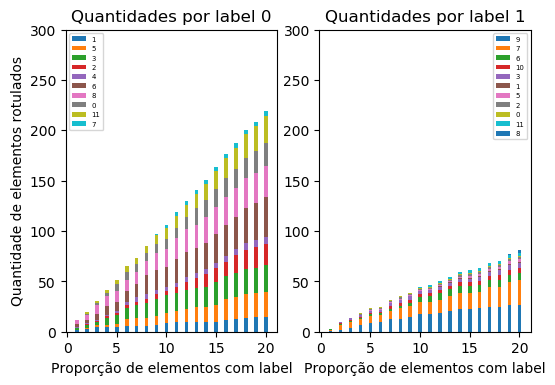

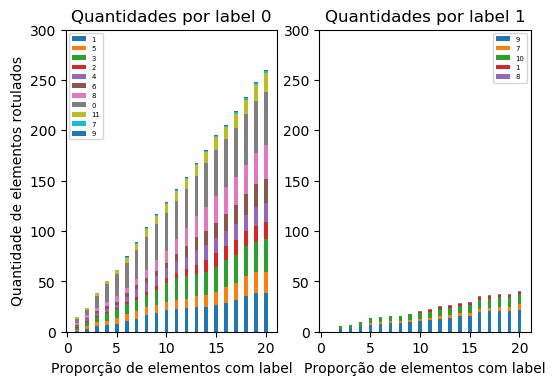

In [ ]:
width = 0.35
for dataset in ['USPS','COIL','g241c','g241n','digits']:
    df = pd.read_csv('comunities/csv/comunity_'+dataset+'_scores.csv')
    df['percentage'] = 100*df['percentage']
    df['percentage'] = df['percentage'].astype('int64')
    
    for centrality in df.centrality.unique():
        fig, ax = plt.subplots(1, 2)
        plt.figsize=(20,10)
        ax[0].set_ylabel('Quantidade de elementos rotulados')
        for label in [0, 1]:
            df_label = df[df['label']==label].sort_values(['percentage'])

            node_array = np.zeros(len(df_label.percentage.unique()))

            first_array = True
            
            ax[label].set_title('Quantidades por label '+str(label))
            for comunity in df_label.comunity.unique():

                perc = pd.DataFrame(df_label.percentage.unique(), columns = ['percentage'])
                query = (df_label['label']==label) &(df_label['comunity']==comunity) &(df_label['centrality']==centrality)
                df_perc = df_label[query][['percentage', 'node']]

                df_plot = perc.merge(df_perc, how='left', 
                            left_on='percentage', 
                            right_on='percentage').fillna(0)
                df_plot = df_plot.sort_values(['percentage'])

                if df_plot['node'].sum() > 0:
                    if first_array:
                        first_array = False
                        ax[label].bar(df_label.percentage.unique(), df_plot['node'].array , width,  label=str(comunity))
                    else:
                        ax[label].bar(df_label.percentage.unique(), df_plot['node'].array , width, bottom=node_array, label=str(comunity))
                    node_array = df_plot['node'].array + node_array
            ax[label].legend(prop={'size':5})
            ax[label].set_ylim(top=300)
            ax[label].set(xlabel='Proporção de elementos com label')
        fig.set_dpi(100)
        fig.savefig('comunities/results/'+dataset+'_'+centrality+'_graphic.png')

In [20]:
df = pd.read_csv('comunities2/csv/comunity_'+dataset+'_scores.csv')
df['percentage'] = df['percentage']*100
df['percentage'] = df['percentage'].astype(int)

comunity = df.groupby(['centrality', 'percentage', ])['comunity'].count()

In [32]:
test = comunity.to_frame()

In [75]:
test.centrality.unique()

array(['betweenness', 'closeness', 'clustering', 'degree', 'random'],
      dtype=object)

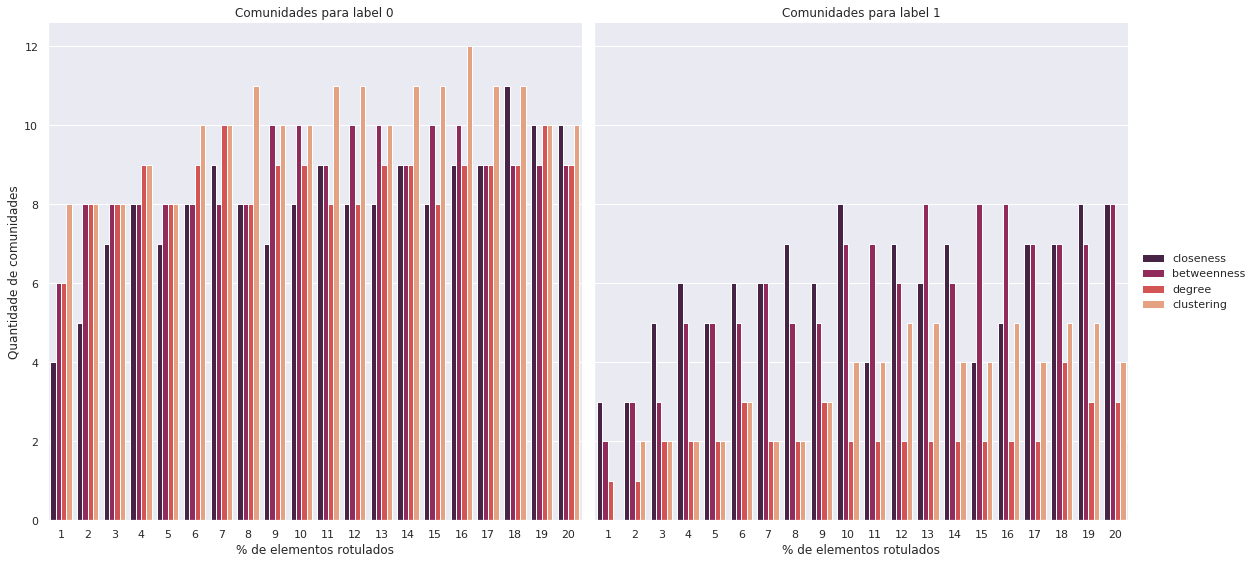

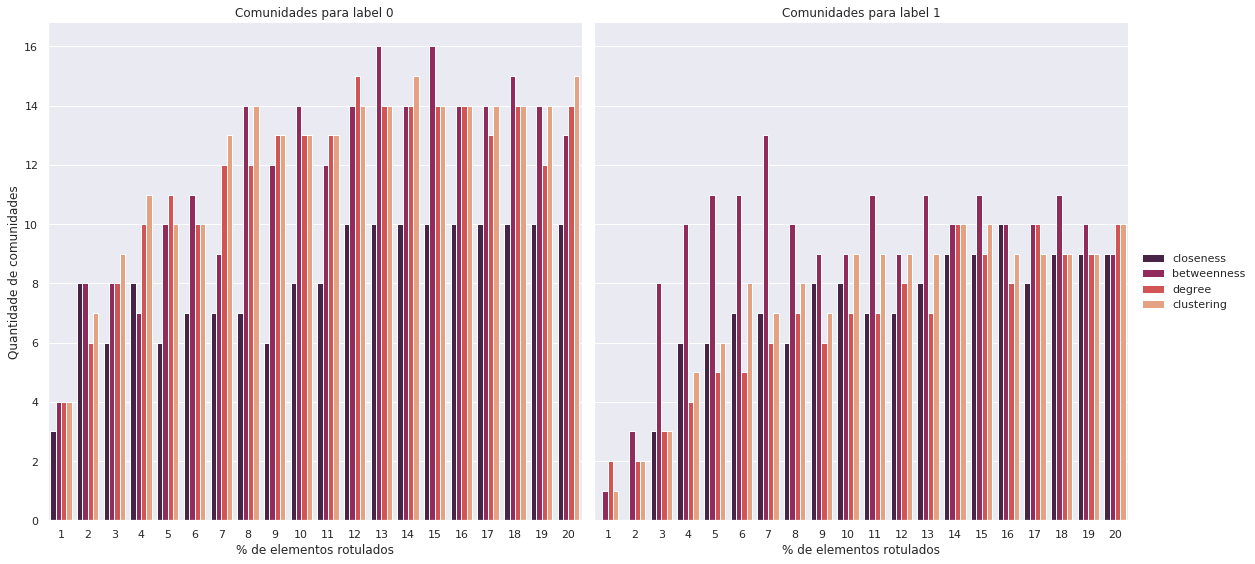

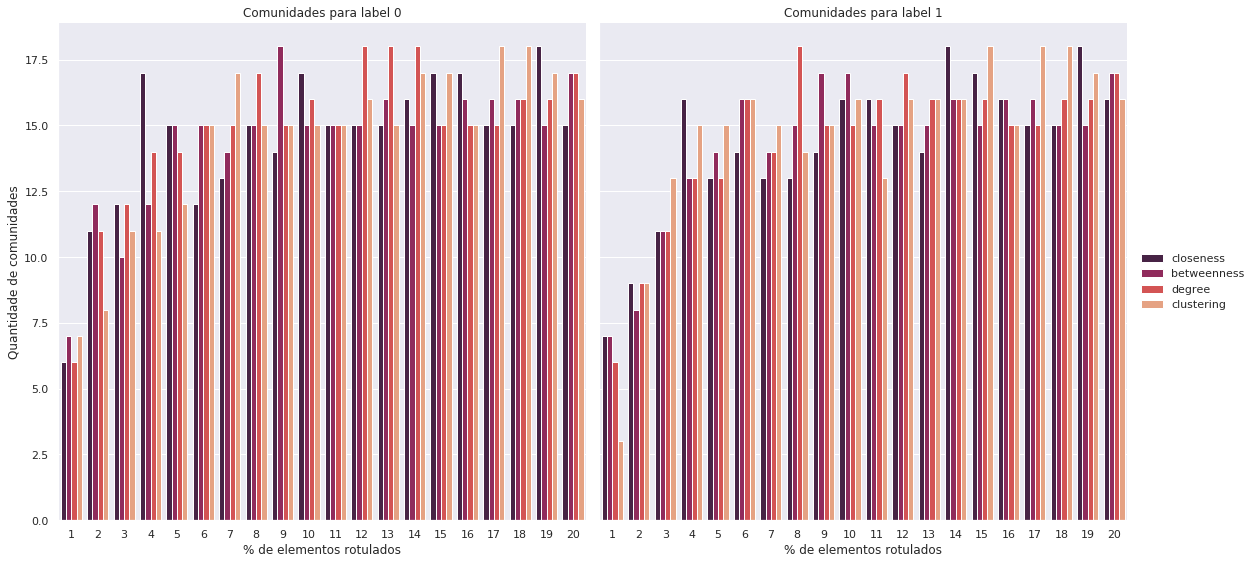

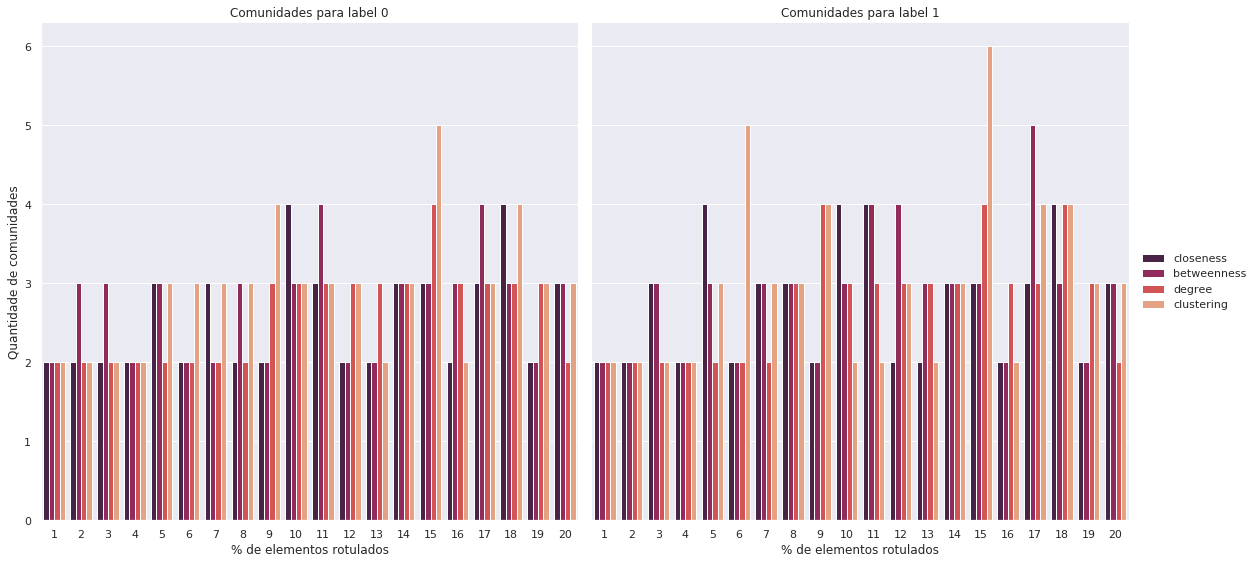

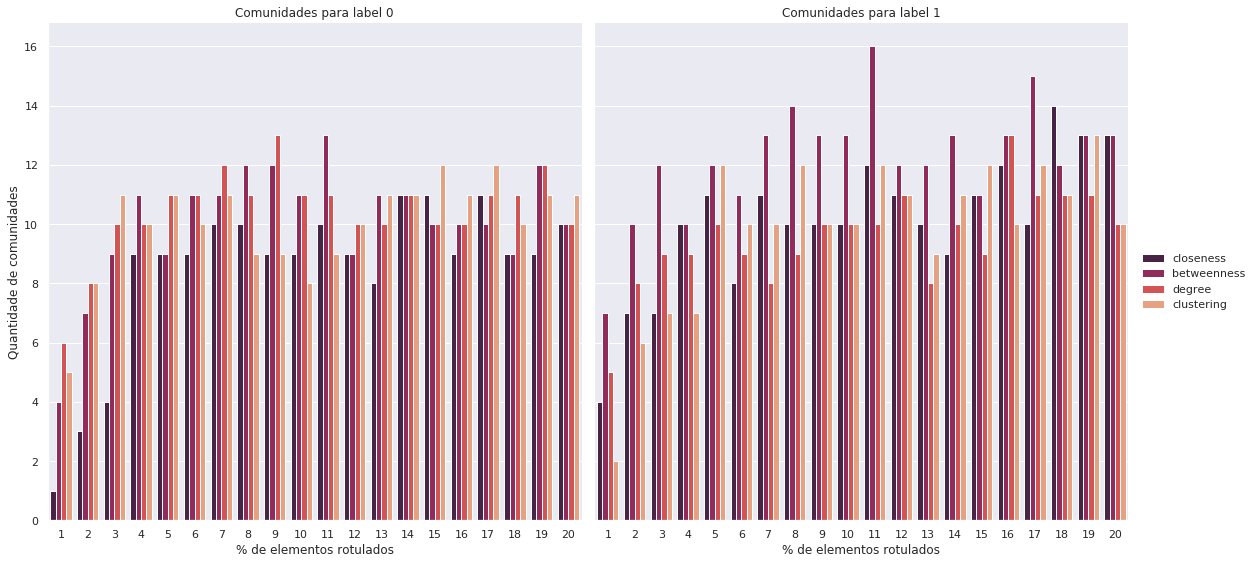

In [81]:
width = 0.35
for dataset in ['USPS','COIL','g241c','g241n','digits']:
    df = pd.read_csv('comunities2/csv/comunity_'+dataset+'_scores.csv')
    df['percentage'] = 100*df['percentage']
    df['percentage'] = df['percentage'].astype('int64')
    
    df = df[df['centrality']!= 'random']
    
    comunity = df.groupby(['centrality', 'percentage', 'label'])['comunity'].count()
    comunity = comunity.to_frame().reset_index()

    
    g = sns.FacetGrid(comunity, col='label', palette="Set2",height=8)
    g.map(sns.barplot, "percentage", "comunity", 'centrality' ,palette='rocket',
          order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
          hue_order = ['closeness', 'betweenness', 'degree', 'clustering']
         ).add_legend().set_xlabels('% de elementos rotulados'
         ).set_ylabels('Quantidade de comunidades'
         ).set_titles("Comunidades para label {col_name}"
         ).savefig('comunities2/quantity/quantity_'+dataset+'.png')
   
        